<a href="https://colab.research.google.com/github/rafakt312/Taller-de-Ciencia-de-datos-Taller1/blob/main/mHealth_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Análisis Exploratorio del Dataset MHEALTH

Este notebook corresponde al **primer producto computacional** del curso.  
El objetivo es realizar un **análisis exploratorio de datos (EDA)** sobre el dataset **MHEALTH**, incluyendo carga, exploración, limpieza y documentación.

---

## 📌 Contenido
1. [Importación de librerías](#section1)  
2. [Carga del dataset](#section2)  
3. [Exploración inicial de los datos](#section3)  
4. [Análisis estadístico y visualizaciones](#section4)  
5. [Limpieza y preprocesamiento](#section5)  
6. [Conclusiones y reflexiones](#section6)  

---

## <a id="section1"></a> 1. Importación de librerías
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid", palette="muted")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid", palette="muted")


In [2]:
# Descarga del dataset MHEALTH desde UCI Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip"

!wget {url} -O mhealth.zip
!unzip -q mhealth.zip -d mhealth

# Exploramos los archivos descargados
import os
os.listdir("mhealth")[:5]


--2025-08-31 22:34:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘mhealth.zip’

mhealth.zip             [     <=>            ]  72.07M  78.3MB/s    in 0.9s    

2025-08-31 22:34:09 (78.3 MB/s) - ‘mhealth.zip’ saved [75567983]



['MHEALTHDATASET']

In [10]:
# Cargar un archivo de ejemplo
df = pd.read_csv("mhealth/MHEALTHDATASET/mHealth_subject1.log",
                 delim_whitespace=True, header=None)

# Vista rápida
df.head()

/tmp/ipython-input-3639670487.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("mhealth/MHEALTHDATASET/mHealth_subject1.log",


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,...,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899,0
1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,...,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570,0
2,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,...,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693,0
3,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,...,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620,0
4,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,...,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500,0


In [6]:
# Dimensiones y tipos de datos
print(df.shape)
print(df.info())

# Valores faltantes
df.isnull().sum()

# Estadísticas básicas
df.describe()


(161280, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161280 entries, 0 to 161279
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       161280 non-null  float64
 1   1       161280 non-null  float64
 2   2       161280 non-null  float64
 3   3       161280 non-null  float64
 4   4       161280 non-null  float64
 5   5       161280 non-null  float64
 6   6       161280 non-null  float64
 7   7       161280 non-null  float64
 8   8       161280 non-null  float64
 9   9       161280 non-null  float64
 10  10      161280 non-null  float64
 11  11      161280 non-null  float64
 12  12      161280 non-null  float64
 13  13      161280 non-null  float64
 14  14      161280 non-null  float64
 15  15      161280 non-null  float64
 16  16      161280 non-null  float64
 17  17      161280 non-null  float64
 18  18      161280 non-null  float64
 19  19      161280 non-null  float64
 20  20      161280 non-null  float64
 2

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,...,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000,161280.000000
mean,-8.737671,0.186275,-0.645707,-0.007960,-0.035226,1.229914,-9.667029,-1.650613,0.010649,-0.663745,...,-4.178516,-4.873407,2.174713,-0.405350,-0.307315,0.312170,0.491517,0.550921,-0.231137,1.352356
std,3.806288,1.453274,3.740042,0.504334,0.643813,4.671081,4.064311,5.030605,0.495378,0.322115,...,4.316094,6.294977,3.620740,0.482499,0.657173,0.537174,26.486971,32.263002,62.555109,2.981766
min,-22.303000,-17.430000,-17.906000,-7.321800,-8.619600,-22.075000,-19.619000,-19.373000,-1.549200,-2.189500,...,-22.173000,-18.932000,-18.228000,-1.702000,-2.164300,-1.234900,-268.690000,-363.900000,-697.160000,0.000000
25%,-9.832900,-0.380692,-2.824350,-0.188380,-0.205130,0.095848,-10.066000,-3.288900,-0.372910,-0.848030,...,-6.267425,-9.271700,0.170480,-0.758820,-0.767970,-0.163790,-5.458975,-10.782000,-13.399000,0.000000
50%,-9.330700,0.252830,-0.316040,-0.025118,-0.025118,1.785900,-9.570500,-0.711750,-0.161410,-0.741090,...,-3.572100,-7.269950,1.478000,-0.505880,-0.587270,0.400860,0.362590,0.352170,-0.369920,0.000000
75%,-8.020800,0.770090,1.665425,0.154890,0.163270,2.643100,-9.025600,0.649125,0.500930,-0.596620,...,-1.819600,-0.063443,4.387400,-0.129410,0.223820,0.775860,6.048675,10.905250,12.793000,0.000000
max,18.960000,20.713000,24.084000,5.450500,8.519100,20.054000,21.161000,25.015000,1.870100,1.525300,...,19.565000,21.914000,25.194000,1.162700,1.556500,2.750000,212.270000,334.980000,629.950000,12.000000


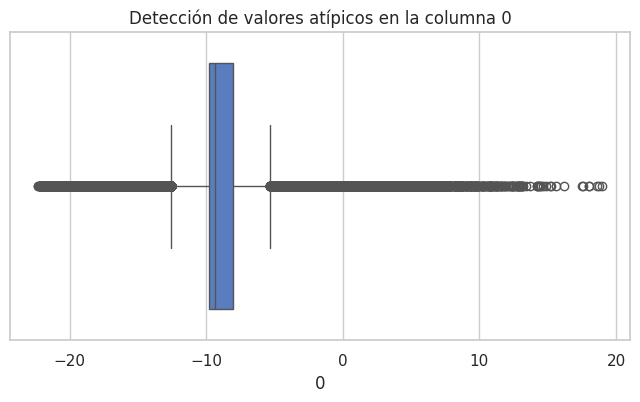

In [8]:
# Detección de valores atípicos con boxplot en una variable
plt.figure(figsize=(8,4))
sns.boxplot(x=df[0])
plt.title("Detección de valores atípicos en la columna 0")
plt.show()


In [9]:
# Normalización / estandarización de variables numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df.iloc[:, :-1])  # todas menos la última (actividad)
scaled[:5]


array([[-0.28393341, -0.12131524,  0.25169236,  0.02408296,  0.06121734,
         0.20444715, -0.00730039,  0.45350206,  0.18824228, -0.54882785,
        -1.1608724 , -0.01667697,  0.01134498,  0.03654338, -1.03598249,
         0.04691173, -0.54877161, -0.0905085 , -1.06971416, -0.51694154,
        -0.10728012, -0.06698471,  0.003201  ],
       [-0.29194649,  0.23241751,  0.2725077 ,  0.02408296,  0.08072414,
         0.24784195,  0.03912829,  0.46406146,  0.15078187, -0.54299141,
        -1.15278567, -0.01315944,  0.01481341,  0.0442126 , -1.0307926 ,
         0.08794457, -0.59411193, -0.0905085 , -1.06971416, -0.51694154,
        -0.10022757, -0.04443064,  0.00891549],
       [-0.24237047, -0.00304468,  0.28960382,  0.0489846 ,  0.11323676,
         0.25233771,  0.02451322,  0.46351282,  0.15078187, -0.54299141,
        -1.15278567, -0.01676224,  0.02184987,  0.04030234, -1.00252621,
         0.0947119 , -0.52447816, -0.0905085 , -1.06971416, -0.51694154,
        -0.07962493, -0.0222